In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *
import numpy as np
import pandas as pd

In [4]:
PATH = "data_human_protein/"
sz=224

In [5]:
torch.cuda.is_available()

True

In [6]:
torch.backends.cudnn.enabled

True

# Training our Model for Multilabel Classification

### Easy Steps to Train a World-Class Image Classifier


1. Use `lr_find()` to find highest learning rate where loss is still clearly improving
2. Train last layer with data augmentation (i.e. precompute=False) for 2-3 epochs with cycle_len=1
3. Unfreeze all layers
4. Set earlier layers to 3x-10x lower learning rate than next higher layer
5. Train full network with cycle_mult=2 until over-fitting

In [7]:
from planet import f2
metrics=[f2]
f_model = resnet34

In [95]:
label_csv = f'{PATH}train.csv'
n = len(list(open(label_csv)))-1
small_n = int(n/4)
val_idxs = get_cv_idxs(small_n)

In [96]:
def get_data(sz):
    tfms = tfms_from_model(f_model, sz, aug_tfms=transforms_top_down, max_zoom=1.1)
    return ImageClassifierData.from_csv(PATH, 'train', label_csv, tfms=tfms,
                    suffix = '_blue.png', val_idxs=val_idxs, test_name='test')

In [97]:
data = get_data(256)

In [98]:
x,y = next(iter(data.val_dl))

In [1]:
list(zip(data.classes, y[1]))

In [14]:
learn =  ConvLearner.pretrained(f_model, data, metrics=metrics)

epoch      trn_loss   val_loss   f2         
    0      0.217004   0.210927   0.257485  



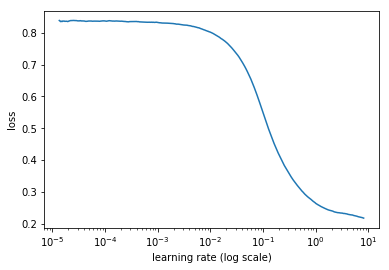

In [101]:
lrf = learn.lr_find()
learn.sched.plot()

In [102]:
lr = 0.5 #adjusted accordingly

In [103]:
learn.fit(lr, 3, cycle_len=1)

epoch      trn_loss   val_loss   f2         
    0      0.17561    0.169681   0.363771  
    1      0.173952   0.169363   0.361454  
    2      0.171135   0.169179   0.361484  



[array([0.16918]), 0.3614844875051826]

In [104]:
learn.save('224_lastlayer_blue')

In [105]:
learn.load('224_lastlayer_blue')

In [106]:
lr = np.array([5e-3,5e-2,5e-1])

In [107]:
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   f2         
    0      0.170014   0.169038   0.363109  
    1      0.172954   0.169594   0.360615  
    2      0.169879   0.168581   0.365688  
    3      0.172264   0.169758   0.356325  
    4      0.169545   0.168899   0.364708  
    5      0.17093    0.168241   0.366012  
    6      0.169844   0.16813    0.36438   



[array([0.16813]), 0.3643802709926601]

In [108]:
learn.save('224_all_blue')

In [54]:
learn.load('224_all_blue')

# Predicting the Kaggle Data

In [10]:
label_csv = f'{PATH}train.csv'

In [11]:
def get_data(sz):
    tfms = tfms_from_model(f_model, sz, aug_tfms=transforms_top_down, max_zoom=1.1)
    return ImageClassifierData.from_csv(PATH, 'train', label_csv, tfms=tfms,
                    suffix = '_green.png', test_name='test')

In [12]:
data = get_data(256)

In [15]:
learn =  ConvLearner.pretrained(f_model, data, metrics=metrics)

In [16]:
learn.load('224_all_green')

In [17]:
multi_preds, y = learn.TTA(is_test=True)
preds = np.mean(multi_preds, 0)

In [26]:
preds[0]

array([0.83154, 0.00702, 0.00006, 0.02362, 0.04036, 0.00582, 0.00445, 0.00025, 0.01066, 0.00448, 0.00343,
       0.00878, 0.01154, 0.00049, 0.14287, 0.00458, 0.02944, 0.00096, 0.58852, 0.0041 , 0.00009, 0.00575,
       0.00481, 0.012  , 0.00978, 0.01809, 0.00012, 0.00006], dtype=float32)

In [157]:
data.classes

['0',
 '1',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '2',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9']

In [160]:
len(data.test_ds.fnames)

46809

# Wrangling the Kaggle Predictions

In [25]:
samples_csv = pd.DataFrame.from_csv(f'{PATH}sample_submission.csv')

/opt/conda/envs/fastai/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  """Entry point for launching an IPython kernel.


In [148]:
def kaggle_ify(predictions, threshold):
    samples_csv = pd.DataFrame.from_csv(f'{PATH}sample_submission.csv')
    
    images = len(predictions)
    classes = len(predictions[0])
    for i in images:
        for j in classes:
            no = 1
    return something

# Easy Steps to Train a World-Class Image Classifier


1. Use `lr_find()` to find highest learning rate where loss is still clearly improving
2. Train last layer with data augmentation (i.e. precompute=False) for 2-3 epochs with cycle_len=1
3. Unfreeze all layers
4. Set earlier layers to 3x-10x lower learning rate than next higher layer
5. Train full network with cycle_mult=2 until over-fitting

## Increase Size to Prevent Overfitting

In [ ]:
# Starting training on small images for a few epochs, then switching to bigger images, and continuing training is an amazingly effective way to avoid overfitting.

# http://forums.fast.ai/t/planet-classification-challenge/7824/96
# set_data doesn’t change the model at all. It just gives it new data to train with.
learn.set_data(get_data(299, bs)) 
learn.freeze()


resnext50 architecture is really good

In [ ]:
learn.bn_freeze(True) # if you use bigger, deeper model resnet50 resnext101, 
#and images are similiar to imagenet, ie normal pictures, use this code after you unfreeze